# darfur data
pull and clean from different data sources

sources
- ACLED Africa dataset
- [humdata](https://data.humdata.org/dataset/darfur-damaged-and-destroyed-villages?), specific to darfur
    - destroyed villages 2003-2010
- UCDP

planning on porting in
- GDELT
- ViEWS

In [69]:
import pandas as pd
from shapely.geometry import Point
import numpy as np
import csv
from shapely import wkt
import geopandas as gpd

In [76]:

## loading datasets
do_print = False

## import sudanese shapefiles
shapefile_path = "../data/shapefiles/Sudan 2015 Divisions" # level 1 admin districts
sudan_shp = gpd.read_file(shapefile_path)
if do_print: print(sudan_shp.head())

## darfur acled data
darfur_acled = pd.read_csv("../data/acled/darfur.csv")
darfur_acled['geometry'] = gpd.points_from_xy(darfur_acled["LONGITUDE"], darfur_acled["LATITUDE"])
darfur_acled = gpd.GeoDataFrame(darfur_acled, geometry='geometry')
if do_print: print(darfur_acled.head())

## darfur village destruction dataset from humdata
darfur_shp = "../data/shapefiles/Darfur Damaged Villages 2010"
village_damage = gpd.read_file(darfur_shp)
if do_print: print(village_damage.head())

## ucdp darfur data
darfur_ucdp = pd.read_csv("../data/ucdp/darfur_113023.csv")
darfur_ucdp['COORDS'] = darfur_ucdp["COORDS"].apply(wkt.loads)
darfur_ucdp = gpd.GeoDataFrame(darfur_ucdp, geometry='COORDS')

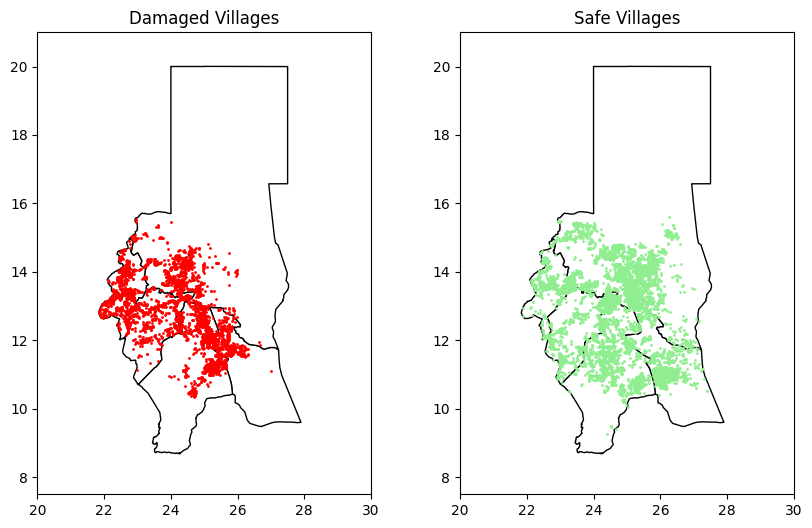

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_darfur(ax):
    darfur_regions = sudan_shp[sudan_shp["NAME_1"].str.contains("Darfur")]
    darfur_regions.plot(ax=ax, edgecolor='black', color="white")
    ax.set_xlim([20, 30])
    ax.set_ylim([7.5, 21])

## Plot comparison of damaged and un-damaged villages
# damaged villages
damaged_villages = village_damage[(village_damage["STATUS"] == "DESTROYED") | (village_damage["STATUS"] == "DAMAGED")]
# damaged_villages.plot(ax=ax, color='red', markersize=1)
safe_villages = village_damage[village_damage["STATUS"] == "NO DAMAGE"]
# safe_villages.plot(ax=ax, color='lightgreen', markersize=1)
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

plot_darfur(axs[0])
damaged_villages.plot(ax=axs[0], color='red', markersize=1)
axs[0].set_title("Damaged Villages")

plot_darfur(axs[1])
safe_villages.plot(ax=axs[1], color='lightgreen', markersize=1)
axs[1].set_title("Safe Villages")

plt.show()

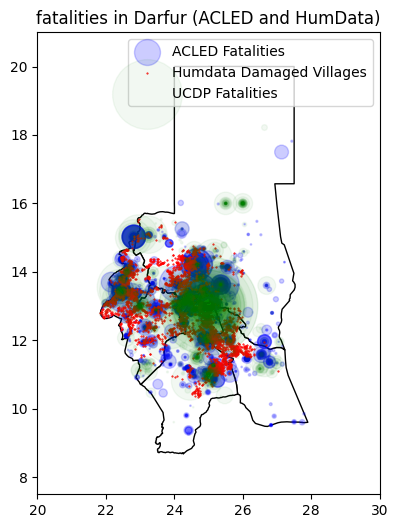

In [80]:
## plot ACLED data
fig, ax = plt.subplots(figsize=(10, 6))
plot_darfur(ax)

darfur_acled.plot(ax=ax, color='blue', markersize=darfur_acled["FATALITIES"], alpha=0.2)
damaged_villages.plot(ax=ax, color='red', markersize=0.25)
# safe_villages.plot(ax=ax, color='lightgreen', markersize=0.25)
darfur_ucdp.plot(ax=ax, color='green', markersize=darfur_ucdp["best_est"], alpha=0.05)

plt.legend(["ACLED Fatalities", "Humdata Damaged Villages", "UCDP Fatalities"])
plt.title("fatalities in Darfur (ACLED and HumData)")
plt.show()



<Axes: >

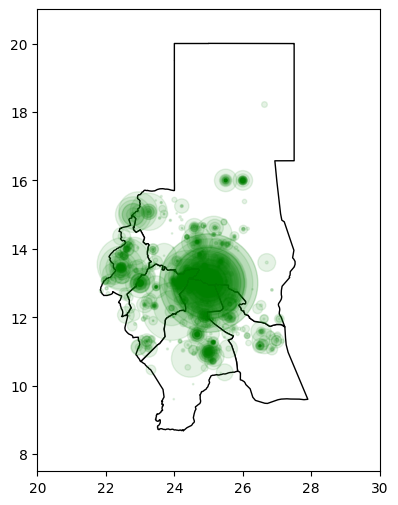

In [73]:
## plot UCDP data
fig, ax = plt.subplots(figsize=(10, 6))
plot_darfur(ax)

darfur_ucdp.plot(ax=ax, color='green', markersize=darfur_ucdp["best_est"], alpha=0.1)

## cleaning data for darfur

In [ ]:
## Only run once to create the ACLED darfur.csv file

# # read original ACLED points
# df = pd.read_csv("../data/acled/africa.csv")

# # Define the borders
# sudan_regions = gpd.read_file("../data/shapefiles/Sudan 2015 Divisions")
# darfur_regions = sudan_regions[sudan_regions["NAME_1"].str.contains("Darfur")]

# # Convert the longitude and latitude to a shapely Point object
# df['COORDS'] = list(zip(df["LONGITUDE"], df["LATITUDE"]))
# df['COORDS'] = df['COORDS'].apply(Point)

# # Create a GeoDataFrame from the DataFrame
# gdf = gpd.GeoDataFrame(df, geometry='COORDS')

# # Filter the GeoDataFrame to only include points within the borders
# gdf_in_darfur = gdf[gdf['COORDS'].apply(lambda x: darfur_regions.geometry.contains(x).any())]
# gdf_in_darfur.to_csv("../data/acled/darfur.csv", index=False)

In [33]:
# run once to generate the darfur_113023.csv file from ucdp data
df = pd.read_csv("../data/ucdp/Sudan_113023.csv")

# Define the borders
sudan_regions = gpd.read_file("../data/shapefiles/Sudan 2015 Divisions")
darfur_regions = sudan_regions[sudan_regions["NAME_1"].str.contains("Darfur")]

# Convert the longitude and latitude to a shapely Point object
from shapely import wkt
df['COORDS'] = df["longitude"]
df['COORDS'] = df['COORDS'].apply(wkt.loads)


# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='COORDS')

# Filter the GeoDataFrame to only include points within the borders
gdf_in_darfur = gdf[gdf['COORDS'].apply(lambda x: darfur_regions.geometry.contains(x).any())]
gdf_in_darfur.to_csv("../data/ucdp/darfur_113023.csv", index=False)

read_df = pd.read_csv("../data/ucdp/darfur_113023.csv")

read_df